In [33]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
import re
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

In [34]:
data = pd.read_csv("train.csv", sep=',')
data [20:70]

,count,hate_speech_count,offensive_language_count,neither_count,class,tweet
20,3,0,3,0,1,""" broke bitch cant tell me nothing """
21,3,0,3,0,1,""" cancel that bitch like Nino """
22,3,0,3,0,1,""" cant you see these hoes wont change """
23,3,0,3,0,1,""" fuck no that bitch dont even suck dick "" &#128514;&#128514;&#128514; the Kermit videos bout to fuck IG up"
24,3,0,3,0,1,""" got ya bitch tip toeing on my hardwood floors "" &#128514; http://t.co/cOU2WQ5L4q"
25,3,0,2,1,1,""" her pussy lips like Heaven doors "" &#128524;"
26,3,0,3,0,1,""" hoe what its hitting for """
27,3,0,3,0,1,""" i met that pussy on Ocean Dr . i gave that pussy a pill "" &#128524;"
28,3,0,3,0,1,""" i need a trippy bitch who fuck on Hennessy """
29,3,0,3,0,1,""" i spend my money how i want bitch its my business """


In [35]:
#рассчитываю долю каждого класса твитов в данном датасете
import numpy as np
hate, offensive, neither = np.bincount(data['class'])
total = hate + offensive + neither
hate_perc = (hate/total)*100
offensive_perc = (offensive/total)*100
neither_perc = (neither/total)*100
print(f'Total:{total}')
print(f'Hate: {hate}; {hate_perc:.2f}% of Total')
print(f'Offensive language: {offensive}; {offensive_perc:.2f}% of Total')
print(f'Neither: {neither}; {neither_perc:.2f}% of Total')

Total:24783
Hate: 1430; 5.77% of Total
Offensive language: 19190; 77.43% of Total
Neither: 4163; 16.80% of Total


In [8]:
!pip install pymorphy2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.5/55.5 kB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 47.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13706 sha256=ca932019aae31edff492d0afd081041fbd906ad23451903aa28dd2711fd36fd8
  Stored in directory: /root/.cache/pip/wheels/fc/ab/d4/5da2067ac95b36618c629a5f93f809425700506f72c9732fac
Successfully built docopt


In [ ]:
!pip install nltk

In [36]:
#расширяю список стопслов
nltk.download('stopwords')
stop_words = stopwords.words('english')

new_stop_words = ["n", "t", "u", "amp", "n't"]
stop_words.extend(new_stop_words)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [37]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [38]:
#Предобработка столбца с твитами: токенизация, удаление стопслов, лемматихация, удаление имен пользователей, ссылок, ретвитов
from pymorphy2 import MorphAnalyzer
morph = MorphAnalyzer()
#stop_words = stopwords.words('english')
def preprocess_tweet(tweet):
    tweet = tweet.lower()
    tweet = re.sub(r'@\w+', '', tweet)
    tweet = re.sub(r'http\S+|www\S+|https\S+', '', tweet)
    tweet = re.sub(r'\brt\b', '', tweet)
    tweet = word_tokenize(tweet)
    tweets_clean = [word for word in tweet if word[0].isalpha() and word not in stop_words]
    tweets_lemm = [morph.parse(word)[0].normal_form for word in tweets_clean]

    return ' '.join(tweets_lemm)
data['tweets_clean'] = data['tweet'].apply(preprocess_tweet)

In [39]:
data['tweets_clean']

0                                 woman complain cleaning house man always take trash
1                                     boy dats cold tyga dwn bad cuffin dat hoe place
2                                        dawg ever fuck bitch start cry confused shit
3                                                                    look like tranny
4                                      shit hear might true might faker bitch told ya
                                             ...                                     
24778                           muthaf lie right tl trash mine bible scriptures hymns
24779                                 gone broke wrong heart baby drove redneck crazy
24780                           young buck wan na eat dat nigguh like aint fuckin dis
24781                                               youu got wild bitches tellin lies
24782    ntac eileen dahlia beautiful color combination pink orange yellow white coll
Name: tweets_clean, Length: 24783, dtype: object

In [40]:
data[data['tweets_clean']=='']


,count,hate_speech_count,offensive_language_count,neither_count,class,tweet,tweets_clean
2206,3,0,1,2,2,1-800-slap-a-hoe,
4828,3,0,1,2,2,@TNKidsFoodPorn @Oreo ..............&#128530;,
6098,3,0,2,1,1,@hoes &#9829;,


In [41]:
#Определение корреляции между hate speech и offensive language
data.corr()

<ipython-input-41-d293344a7e50>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,count,hate_speech_count,offensive_language_count,neither_count,class
count,1.000000,0.101926,0.534604,0.063326,-0.010029
hate_speech_count,0.101926,1.000000,-0.261808,-0.157599,-0.515732
offensive_language_count,0.534604,-0.261808,1.000000,-0.684406,-0.410440
neither_count,0.063326,-0.157599,-0.684406,1.000000,0.800687
class,-0.010029,-0.515732,-0.410440,0.800687,1.000000


<ipython-input-42-9ec1e1890963>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr())


<Axes: >

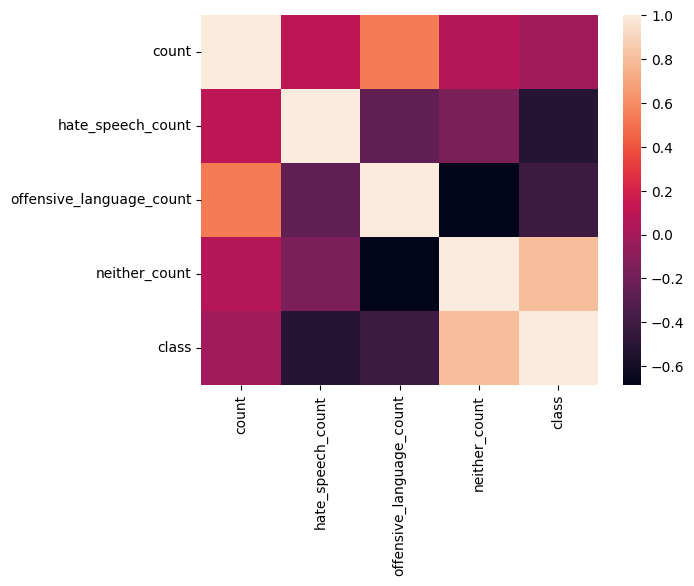

In [42]:
import seaborn as sns

sns.heatmap(data.corr())


In [67]:
data

,count,hate_speech_count,offensive_language_count,neither_count,class,tweet,tweets_clean,blob_polar,blob_subj,sid_pos,sid_neg
0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't complain about cleaning up your house. &amp; as a man you should always take the trash out...,woman n't complain cleaning house amp man always take trash,0.00000,0.00000,0.190,0.000
1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn bad for cuffin dat hoe in the 1st place!!,boy dats cold tyga dwn bad cuffin dat hoe place,-0.65000,0.83333,0.000,0.280
2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby4life: You ever fuck a bitch and she start to cry? You be confused as shit,dawg ever fuck bitch start cry confused shit,-0.33333,0.70000,0.000,0.845
3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she look like a tranny,look like tranny,0.00000,0.00000,0.556,0.000
4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you hear about me might be true or it might be faker than the bitch who told it to ya &#57361;,shit hear might true might faker bitch told ya,0.07500,0.72500,0.173,0.457
...,...,...,...,...,...,...,...,...,...,...,...
24778,3,0,2,1,1,"you's a muthaf***in lie &#8220;@LifeAsKing: @20_Pearls @corey_emanuel right! His TL is trash &#8230;. Now, mine? Bible scriptures and hymns&#8221;",muthaf lie right tl trash mine bible scriptures hymns,0.28571,0.53571,0.000,0.000
24779,3,0,1,2,2,"you've gone and broke the wrong heart baby, and drove me redneck crazy",gone broke wrong heart baby drove redneck crazy,-0.55000,0.90000,0.000,0.624
24780,3,0,3,0,1,young buck wanna eat!!.. dat nigguh like I aint fuckin dis up again,young buck wan na eat dat nigguh like aint fuckin dis,-0.05000,0.27500,0.200,0.000
24781,6,0,6,0,1,youu got wild bitches tellin you lies,youu got wild bitches tellin lies,0.10000,0.40000,0.000,0.626


In [43]:
#Анализ тональности столбца с твитами с помощью TextBlob
from textblob import TextBlob
blob_polar = []
blob_subj = []
for i in data.tweets_clean:
    analysis = TextBlob(i).sentiment
    blob_polar.append(round(analysis[0], 5))
    blob_subj.append(round(analysis[1], 5))

data['blob_polar'] = blob_polar
data['blob_subj'] = blob_subj
data

,count,hate_speech_count,offensive_language_count,neither_count,class,tweet,tweets_clean,blob_polar,blob_subj
0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't complain about cleaning up your house. &amp; as a man you should always take the trash out...,woman complain cleaning house man always take trash,0.00000,0.00000
1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn bad for cuffin dat hoe in the 1st place!!,boy dats cold tyga dwn bad cuffin dat hoe place,-0.65000,0.83333
2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby4life: You ever fuck a bitch and she start to cry? You be confused as shit,dawg ever fuck bitch start cry confused shit,-0.33333,0.70000
3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she look like a tranny,look like tranny,0.00000,0.00000
4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you hear about me might be true or it might be faker than the bitch who told it to ya &#57361;,shit hear might true might faker bitch told ya,0.07500,0.72500
...,...,...,...,...,...,...,...,...,...
24778,3,0,2,1,1,"you's a muthaf***in lie &#8220;@LifeAsKing: @20_Pearls @corey_emanuel right! His TL is trash &#8230;. Now, mine? Bible scriptures and hymns&#8221;",muthaf lie right tl trash mine bible scriptures hymns,0.28571,0.53571
24779,3,0,1,2,2,"you've gone and broke the wrong heart baby, and drove me redneck crazy",gone broke wrong heart baby drove redneck crazy,-0.55000,0.90000
24780,3,0,3,0,1,young buck wanna eat!!.. dat nigguh like I aint fuckin dis up again,young buck wan na eat dat nigguh like aint fuckin dis,-0.05000,0.27500
24781,6,0,6,0,1,youu got wild bitches tellin you lies,youu got wild bitches tellin lies,0.10000,0.40000


In [44]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [45]:
#Анализ тональности столбца с твитами с помощью SentimentIntensityAnalyzer
from nltk.sentiment import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

sid_pos = []
sid_neg = []
for i in data.tweets_clean:
  sentiment_sid = sid.polarity_scores(i)
  sid_pos.append(round(sentiment_sid['pos'], 5))
  sid_neg.append(round(sentiment_sid['neg'], 5))

data['sid_pos'] = sid_pos
data['sid_neg'] = sid_neg
data[:20]

,count,hate_speech_count,offensive_language_count,neither_count,class,tweet,tweets_clean,blob_polar,blob_subj,sid_pos,sid_neg
0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't complain about cleaning up your house. &amp; as a man you should always take the trash out...,woman complain cleaning house man always take trash,0.00000,0.00000,0.000,0.263
1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn bad for cuffin dat hoe in the 1st place!!,boy dats cold tyga dwn bad cuffin dat hoe place,-0.65000,0.83333,0.000,0.280
2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby4life: You ever fuck a bitch and she start to cry? You be confused as shit,dawg ever fuck bitch start cry confused shit,-0.33333,0.70000,0.000,0.845
3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she look like a tranny,look like tranny,0.00000,0.00000,0.556,0.000
4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you hear about me might be true or it might be faker than the bitch who told it to ya &#57361;,shit hear might true might faker bitch told ya,0.07500,0.72500,0.173,0.457
5,3,1,2,0,1,"!!!!!!!!!!!!!!!!!!""@T_Madison_x: The shit just blows me..claim you so faithful and down for somebody but still fucking with hoes! &#128514;&#128514;&#128514;""",shit blows claim faithful somebody still fucking hoes,-0.40000,0.80000,0.232,0.288
6,3,0,3,0,1,"!!!!!!""@__BrighterDays: I can not just sit up and HATE on another bitch .. I got too much shit going on!""",sit hate another bitch got much shit going,-0.50000,0.85000,0.000,0.689
7,3,0,3,0,1,!!!!&#8220;@selfiequeenbri: cause I'm tired of you big bitches coming for us skinny girls!!&#8221;,cause tired big bitches coming us skinny girls,-0.20000,0.40000,0.000,0.531
8,3,0,3,0,1,""" &amp; you might not get ya bitch back &amp; thats that """,might get ya bitch back thats,0.00000,0.00000,0.000,0.432
9,3,1,2,0,1,""" @rhythmixx_ :hobbies include: fighting Mariam""\n\nbitch",hobbies include fighting mariam bitch,0.00000,0.00000,0.000,0.677


In [46]:
#Сравнение результатов анализа твитов, относящихся к hate speech
pd.set_option("display.max_colwidth", None)
hate_speech_filtered = data[data["class"] == 0][["count", "hate_speech_count", "class", "tweets_clean", "blob_polar", "blob_subj", "sid_pos", "sid_neg"]]
hate_speech_filtered

,count,hate_speech_count,class,tweets_clean,blob_polar,blob_subj,sid_pos,sid_neg
85,3,2,0,queer gaywad,0.00000,0.00000,0.000,0.000
89,3,3,0,alsarabsss hes beaner smh tell hes mexican,0.00000,0.00000,0.000,0.277
110,3,3,0,fucking gay blacklisted hoe holding tehgodclan anyway,0.41667,0.58333,0.000,0.000
184,3,3,0,lmfaoooo hate black people black people niggers,-0.37778,0.58889,0.000,0.381
202,3,2,0,least nigger lmfao,-0.30000,0.40000,0.874,0.000
...,...,...,...,...,...,...,...,...
24576,3,2,0,guy biggest faggot omfg,0.00000,0.00000,0.000,0.595
24685,3,2,0,one names offensive kike wop kraut wetback jigaboo towelhead gook redskin,0.00000,0.00000,0.000,0.231
24751,3,2,0,pussy ass nigga know nigga,0.00000,0.00000,0.000,0.467
24776,3,3,0,niggers,0.00000,0.00000,0.000,0.000


In [47]:
#Сравнение результатов анализа твитов, относящихся к offensive language
pd.set_option("display.max_colwidth", None)
offensive_lang_filtered = data[data["class"] == 1][["count", "offensive_language_count", "class", "tweets_clean", "blob_polar", "blob_subj",
                                                    "sid_pos", "sid_neg"]]
offensive_lang_filtered

,count,offensive_language_count,class,tweets_clean,blob_polar,blob_subj,sid_pos,sid_neg
1,3,3,1,boy dats cold tyga dwn bad cuffin dat hoe place,-0.65000,0.83333,0.000,0.280
2,3,3,1,dawg ever fuck bitch start cry confused shit,-0.33333,0.70000,0.000,0.845
3,3,2,1,look like tranny,0.00000,0.00000,0.556,0.000
4,6,6,1,shit hear might true might faker bitch told ya,0.07500,0.72500,0.173,0.457
5,3,2,1,shit blows claim faithful somebody still fucking hoes,-0.40000,0.80000,0.232,0.288
...,...,...,...,...,...,...,...,...
24774,3,3,1,really care bout dis bitch dick yo feelings,0.20000,0.20000,0.224,0.455
24775,3,3,1,worried bout bitches need,0.00000,0.00000,0.000,0.753
24778,3,2,1,muthaf lie right tl trash mine bible scriptures hymns,0.28571,0.53571,0.000,0.000
24780,3,3,1,young buck wan na eat dat nigguh like aint fuckin dis,-0.05000,0.27500,0.200,0.000


In [48]:
#Сравнительный анализ самых частотных слов, относящихся к hate speech
hate_speech_lst = data[data["class"] == 0]["tweets_clean"].tolist()
hate_speech_str = ' '.join(hate_speech_lst)
hate_speech_str

"queer gaywad alsarabsss hes beaner smh tell hes mexican fucking gay blacklisted hoe holding tehgodclan anyway lmfaoooo hate black people black people niggers least nigger lmfao ariza snake coward least cripple like hero roach lmaoo drakes new shoes released nike/jordan yes glitter shoes dudes fag gerryshalloweenparty halloween yesterday stupid nigger bored supposed cute faggot sometimes lassen cc coach wants feel youll get nig doubt jackies retard blondeproblems least make grilled cheese stacey dash baddest bitch evaaaa worry nigga see worry nigga see dat da nigga fuckin yo bitch hey go look video man found kidnapped girls ohio nigger shitmybosssays let kill cracker babies wtf hear wow grandma used call porch monkey time come think refer broken bottle nigger knife nah yo thought some1 photoshopped face faggot smmfh hate yall people time aryan race stand say mongerls turn world ghetto slum sour apple bitter bitches fuckin wit em hate niggers hate faggots hate spics rally queer hut like

In [49]:
#Поиск самых частотных слов (hate speech)
from collections import Counter
hate_words = re.findall (r'\b\w+\b', hate_speech_str)

Counter(hate_words).most_common(20)

[('bitch', 209),
 ('faggot', 191),
 ('like', 169),
 ('nigga', 140),
 ('ass', 138),
 ('white', 127),
 ('fuck', 121),
 ('trash', 113),
 ('nigger', 112),
 ('fucking', 94),
 ('fag', 76),
 ('niggas', 76),
 ('get', 68),
 ('faggots', 62),
 ('shit', 60),
 ('people', 59),
 ('bitches', 59),
 ('hate', 58),
 ('got', 57),
 ('niggers', 56)]

In [50]:
# Анализ этих же слов с TextBlob
polarities = {}
for word in hate_words:
  if word in [item[0] for item in Counter(hate_words).most_common(20)]:
      polarity = TextBlob(word).sentiment.polarity
      polarities[word] = polarity
for word, polarity in polarities.items():
  print(f"{word}:{polarity}")

fucking:-0.6
hate:-0.8
people:0.0
niggers:0.0
nigger:0.0
like:0.0
fag:0.0
faggot:0.0
get:0.0
bitch:0.0
nigga:0.0
bitches:0.0
faggots:0.0
fuck:-0.4
shit:-0.2
ass:0.0
white:0.0
trash:0.0
niggas:0.0
got:0.0


In [51]:
#SentimentIntensityAnalyzer
polarities = {}
for word in hate_words:
  if word in [item[0] for item in Counter(hate_words).most_common(20)]:
      polarity = sid.polarity_scores(word)['compound']
      polarities[word] = polarity
for word, polarity in polarities.items():
  print(f"{word}:{polarity}")

fucking:0.0
hate:-0.5719
people:0.0
niggers:0.0
nigger:-0.6486
like:0.3612
fag:-0.4767
faggot:-0.6597
get:0.0
bitch:-0.5859
nigga:0.0
bitches:-0.5994
faggots:-0.6369
fuck:-0.5423
shit:-0.5574
ass:-0.5423
white:0.0
trash:0.0
niggas:-0.34
got:0.0


In [52]:
#Сравнительный анализ самых частотных слов, относящихся к offensive language
offensive_lang_lst = data[data["class"] == 1]["tweets_clean"].tolist()
offensive_lang_str = ' '.join(offensive_lang_lst)
offensive_lang_str

"boy dats cold tyga dwn bad cuffin dat hoe place dawg ever fuck bitch start cry confused shit look like tranny shit hear might true might faker bitch told ya shit blows claim faithful somebody still fucking hoes sit hate another bitch got much shit going cause tired big bitches coming us skinny girls might get ya bitch back thats hobbies include fighting mariam bitch keeks bitch curves everyone lol walked conversation like smh murda gang bitch gang land hoes smoke losers yea go ig bad bitches thing like bitch get bitch nigga miss bitch plz whatever bitch love bitches get cut everyday b black bottle bad bitch broke bitch cant tell nothing cancel bitch like nino cant see hoes wont change fuck bitch dont even suck dick kermit videos bout fuck ig got ya bitch tip toeing hardwood floors pussy lips like heaven doors hoe hitting met pussy ocean dr gave pussy pill need trippy bitch fuck hennessy spend money want bitch business txt old bitch new bitch pussy wetter say im back old old bitches wo

In [53]:
#Поиск самых частотных слов (offensive language)
offensive_words = re.findall (r'\b\w+\b', offensive_lang_str )

Counter(offensive_words).most_common(20)

[('bitch', 8125),
 ('bitches', 3058),
 ('hoes', 2331),
 ('like', 2313),
 ('pussy', 2104),
 ('hoe', 1872),
 ('ass', 1438),
 ('got', 1413),
 ('fuck', 1306),
 ('shit', 1220),
 ('get', 1220),
 ('nigga', 1089),
 ('lol', 912),
 ('ai', 856),
 ('niggas', 714),
 ('know', 683),
 ('love', 589),
 ('yo', 569),
 ('na', 562),
 ('one', 541)]

In [54]:
# Анализ этих же слов с TextBlob
polarities = {}
for word in offensive_words:
  if word in [item[0] for item in Counter(offensive_words).most_common(20)]:
      polarity = TextBlob(word).sentiment.polarity
      polarities[word] = polarity
for word, polarity in polarities.items():
  print(f"{word}:{polarity}")

hoe:0.0
fuck:-0.4
bitch:0.0
shit:-0.2
like:0.0
hoes:0.0
got:0.0
bitches:0.0
get:0.0
lol:0.8
nigga:0.0
love:0.5
pussy:0.0
ai:0.0
ass:0.0
niggas:0.0
na:0.0
know:0.0
one:0.0
yo:0.0


In [55]:
#SentimentIntensityAnalyzer
polarities = {}
for word in offensive_words:
  if word in [item[0] for item in Counter(offensive_words).most_common(20)]:
      polarity = sid.polarity_scores(word)['compound']
      polarities[word] = polarity
for word, polarity in polarities.items():
  print(f"{word}:{polarity}")

hoe:0.0
fuck:-0.5423
bitch:-0.5859
shit:-0.5574
like:0.3612
hoes:0.0
got:0.0
bitches:-0.5994
get:0.0
lol:0.4215
nigga:0.0
love:0.6369
pussy:0.0
ai:0.0
ass:-0.5423
niggas:-0.34
na:0.0
know:0.0
one:0.0
yo:0.0
